In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Loading data and Data Preprocessing

In [2]:
aot = pd.read_csv('../datasets/air_quality/Aotizhongxin_20130301-20170228.csv')
chan = pd.read_csv('../datasets/air_quality/Changping_20130301-20170228.csv')
ding = pd.read_csv('../datasets/air_quality/Dingling_20130301-20170228.csv')
dong = pd.read_csv('../datasets/air_quality/Dongsi_20130301-20170228.csv')
guan = pd.read_csv('../datasets/air_quality/Guanyuan_20130301-20170228.csv')
guch = pd.read_csv('../datasets/air_quality/Gucheng_20130301-20170228.csv')
hua = pd.read_csv('../datasets/air_quality/Huairou_20130301-20170228.csv')
nong = pd.read_csv('../datasets/air_quality/Nongzhanguan_20130301-20170228.csv')
shu = pd.read_csv('../datasets/air_quality/Shunyi_20130301-20170228.csv')
tian = pd.read_csv('../datasets/air_quality/Tiantan_20130301-20170228.csv')
wan = pd.read_csv('../datasets/air_quality/Wanliu_20130301-20170228.csv')
wans = pd.read_csv('../datasets/air_quality/Wanshouxigong_20130301-20170228.csv')

In [3]:
dfs = [aot, chan, ding, dong, guan, guch, hua, nong, shu, tian, wan, wans]

In [4]:
air_quality = pd.concat(dfs).reset_index(drop=True).drop('No', 1)
air_quality.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
air_quality.tail()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [6]:
air_quality.columns = air_quality.columns.str.lower()

air_quality.rename(columns={'pm2.5':'pm25'}, inplace=True)

In [7]:
air_quality.sample(5)

,year,month,day,hour,pm25,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
338357,2015,10,6,5,291.0,291.0,2.0,57.0,1900.0,2.0000,14.5,1013.4,13.9,0.0,NE,1.1,Tiantan
311069,2016,8,25,5,21.0,21.0,2.0,NaN,200.0,49.0000,27.2,1003.0,17.4,0.0,NNW,2.2,Shunyi
180940,2013,10,21,4,47.0,87.0,3.0,76.0,NaN,1.2852,6.8,1015.3,4.1,0.0,N,0.0,Gucheng
304357,2015,11,19,13,95.0,95.0,2.0,43.0,1300.0,2.0000,4.2,1022.1,3.3,1.0,SE,1.6,Shunyi
47025,2014,7,12,9,4.0,5.0,2.0,14.0,200.0,84.0000,31.5,995.2,7.9,0.0,NE,2.2,Changping


In [8]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   pm25     412029 non-null  float64
 5   pm10     414319 non-null  float64
 6   so2      411747 non-null  float64
 7   no2      408652 non-null  float64
 8   co       400067 non-null  float64
 9   o3       407491 non-null  float64
 10  temp     420370 non-null  float64
 11  pres     420375 non-null  float64
 12  dewp     420365 non-null  float64
 13  rain     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  wspm     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


In [9]:
air_quality.isna().sum()

year           0
month          0
day            0
hour           0
pm25        8739
pm10        6449
so2         9021
no2        12116
co         20701
o3         13277
temp         398
pres         393
dewp         403
rain         390
wd          1822
wspm         318
station        0
dtype: int64

In [10]:
air_quality.isna().sum() / len(air_quality) * 100

year       0.000000
month      0.000000
day        0.000000
hour       0.000000
pm25       2.076916
pm10       1.532674
so2        2.143937
no2        2.879497
co         4.919813
o3         3.155421
temp       0.094589
pres       0.093401
dewp       0.095777
rain       0.092688
wd         0.433018
wspm       0.075576
station    0.000000
dtype: float64

## Outlier Detection

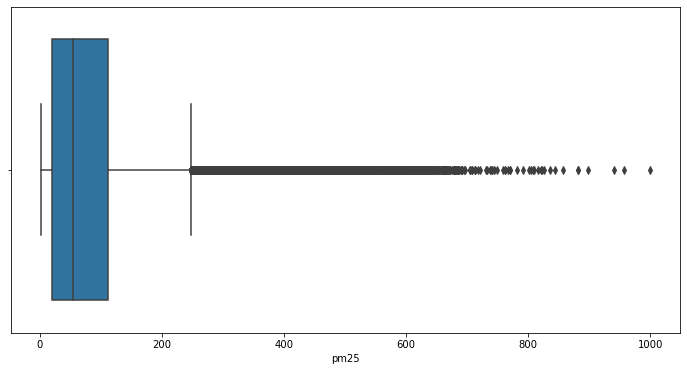

In [11]:
plt.rcParams['figure.figsize'] = [12, 6]
sns.boxplot(data=air_quality, x='pm25')
plt.show()

In [12]:
(air_quality.pm25 > 250).sum() # total pm25 values greater than 250

18436

In [13]:
pm25 = air_quality.loc[air_quality.pm25 > 250]
pm25.head()

,year,month,day,hour,pm25,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
120,2013,3,6,0,284.0,315.0,133.0,174.0,4000.0,28.0,4.9,1008.5,-6.4,0.0,NE,1.2,Aotizhongxin
121,2013,3,6,1,272.0,300.0,131.0,166.0,4000.0,22.0,4.8,1008.3,-5.9,0.0,NE,1.5,Aotizhongxin
140,2013,3,6,20,254.0,396.0,107.0,154.0,4200.0,17.0,4.4,1008.2,-2.5,0.0,SSW,1.1,Aotizhongxin
141,2013,3,6,21,266.0,380.0,117.0,159.0,3799.0,17.0,3.8,1007.7,-2.2,0.0,WSW,1.9,Aotizhongxin
142,2013,3,6,22,254.0,335.0,111.0,148.0,4099.0,17.0,2.4,1007.3,-2.5,0.0,WSW,1.2,Aotizhongxin


In [14]:
pm25.station.unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

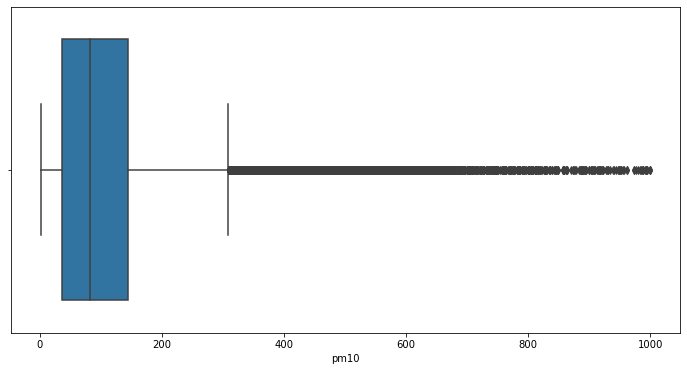

In [15]:
sns.boxplot(data=air_quality, x='pm10')
plt.show()

In [16]:
(air_quality.pm10 > 320).sum() # total pm10 values greater than 320

12708

In [17]:
pm10 = air_quality.loc[air_quality.pm10 > 320]
pm10.head()

,year,month,day,hour,pm25,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
139,2013,3,6,19,242.0,338.0,124.0,164.0,3700.0,17.0,5.1,1007.6,-2.5,0.0,WSW,1.2,Aotizhongxin
140,2013,3,6,20,254.0,396.0,107.0,154.0,4200.0,17.0,4.4,1008.2,-2.5,0.0,SSW,1.1,Aotizhongxin
141,2013,3,6,21,266.0,380.0,117.0,159.0,3799.0,17.0,3.8,1007.7,-2.2,0.0,WSW,1.9,Aotizhongxin
142,2013,3,6,22,254.0,335.0,111.0,148.0,4099.0,17.0,2.4,1007.3,-2.5,0.0,WSW,1.2,Aotizhongxin
143,2013,3,6,23,260.0,360.0,119.0,145.0,4000.0,17.0,2.3,1007.2,-2.4,0.0,NNE,1.3,Aotizhongxin


In [18]:
pm10.station.unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [19]:
((air_quality.pm25 > 250) & (air_quality.pm10 > 320)).sum()

9921

- This number implies that a majority of the instances with outliers possess outlying values in both PM25 and PM10 together, which means they could be related.

In [20]:
air_quality.describe().T

,count,mean,std,min,25%,50%,75%,max
year,420768.0,2014.662560,1.177198,2013.0000,2014.00,2015.0,2016.00,2017.0
month,420768.0,6.522930,3.448707,1.0000,4.00,7.0,10.00,12.0
day,420768.0,15.729637,8.800102,1.0000,8.00,16.0,23.00,31.0
hour,420768.0,11.500000,6.922195,0.0000,5.75,11.5,17.25,23.0
pm25,412029.0,79.793428,80.822391,2.0000,20.00,55.0,111.00,999.0
pm10,414319.0,104.602618,91.772426,2.0000,36.00,82.0,145.00,999.0
so2,411747.0,15.830835,21.650603,0.2856,3.00,7.0,20.00,500.0
no2,408652.0,50.638586,35.127912,1.0265,23.00,43.0,71.00,290.0
co,400067.0,1230.766454,1160.182716,100.0000,500.00,900.0,1500.00,10000.0
o3,407491.0,57.372271,56.661607,0.2142,11.00,45.0,82.00,1071.0


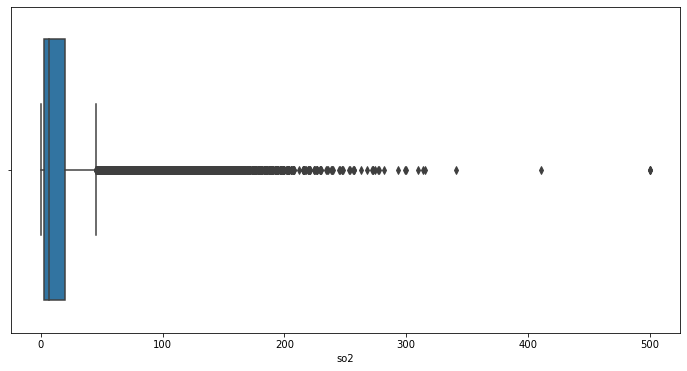

In [21]:
sns.boxplot(data=air_quality, x='so2')
plt.show()

In [22]:
(air_quality.so2 > 70).sum()

14014

In [23]:
((air_quality.pm25 > 250) & (air_quality.pm10 > 320) & (air_quality.so2 > 70)).sum()

2214

In [24]:
(air_quality.so2 > 300).sum()

8

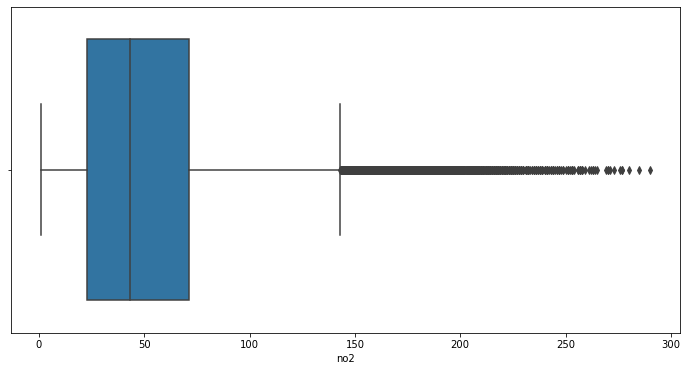

In [25]:
sns.boxplot(data=air_quality, x='no2')
plt.show()

In [26]:
(air_quality.no2 > 150).sum()

5267

In [27]:
((air_quality.pm25 > 250) & (air_quality.pm10 > 320) & (air_quality.so2 > 70) & (air_quality.no2 > 150)).sum()

667

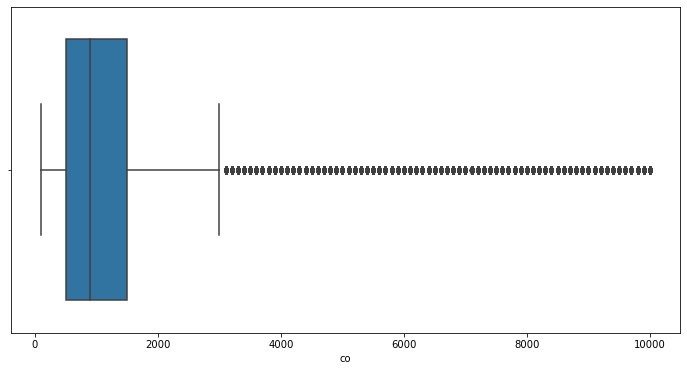

In [28]:
sns.boxplot(data=air_quality, x='co')
plt.show()

In [29]:
(air_quality.co > 3000).sum()

28054

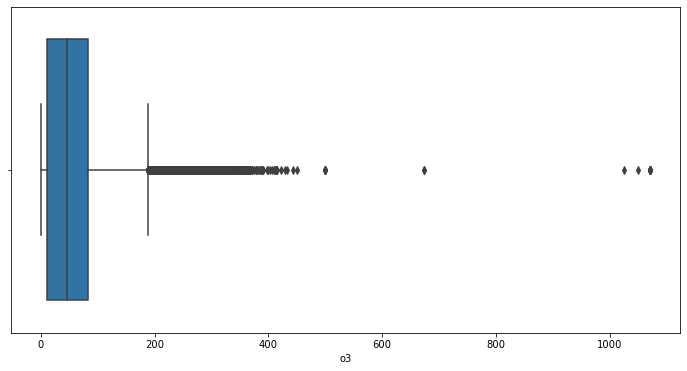

In [30]:
sns.boxplot(data=air_quality, x='o3')
plt.show()

In [31]:
(air_quality.o3 > 200).sum()

13088

In [32]:
(air_quality.o3 > 470).sum()

24

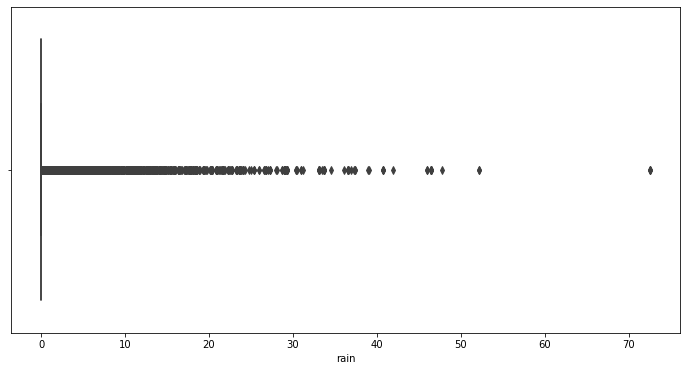

In [33]:
sns.boxplot(data=air_quality, x='rain')
plt.show()

In [34]:
air_quality.rain.value_counts(normalize=True)

0.0     0.960702
0.1     0.008854
0.2     0.004379
0.3     0.003288
0.4     0.002158
          ...   
36.1    0.000002
18.2    0.000002
26.7    0.000002
18.9    0.000002
22.4    0.000002
Name: rain, Length: 253, dtype: float64

In [35]:
air_quality.drop('rain', 1, inplace=True)

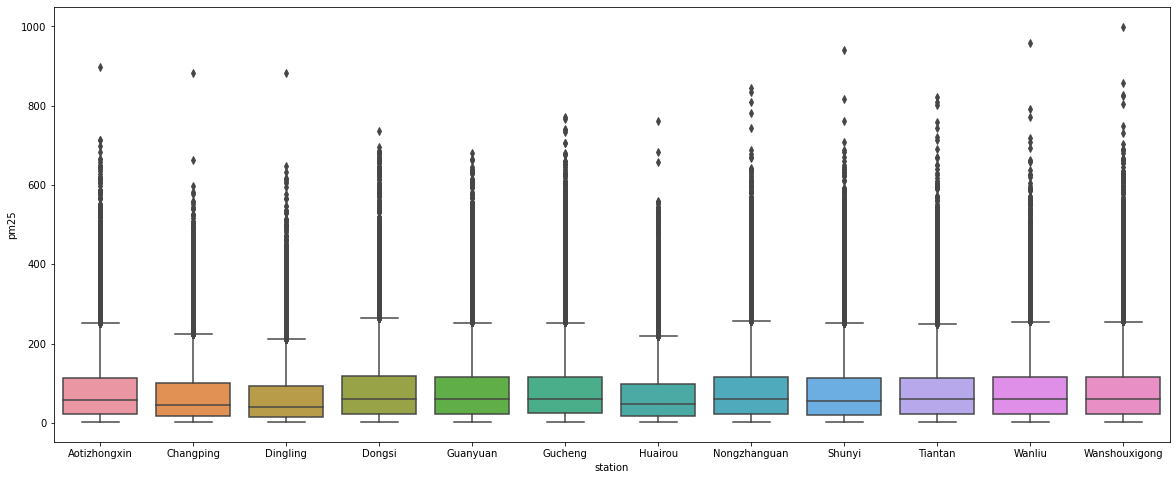

In [36]:
plt.rcParams['figure.figsize'] = [20, 8]


sns.boxplot(data=air_quality, x='station', y='pm25')
plt.show()

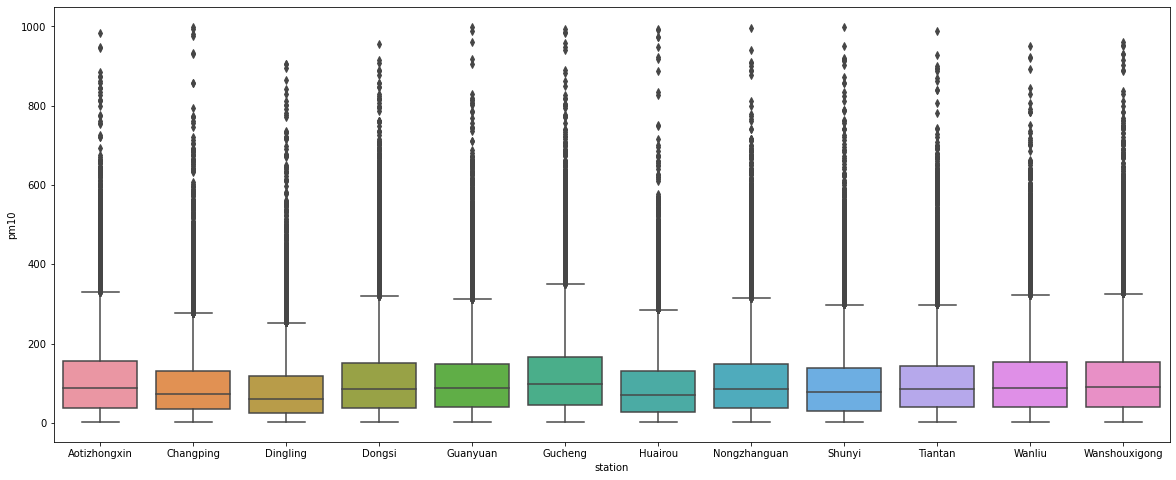

In [37]:
sns.boxplot(data=air_quality, x='station', y='pm10')
plt.show()

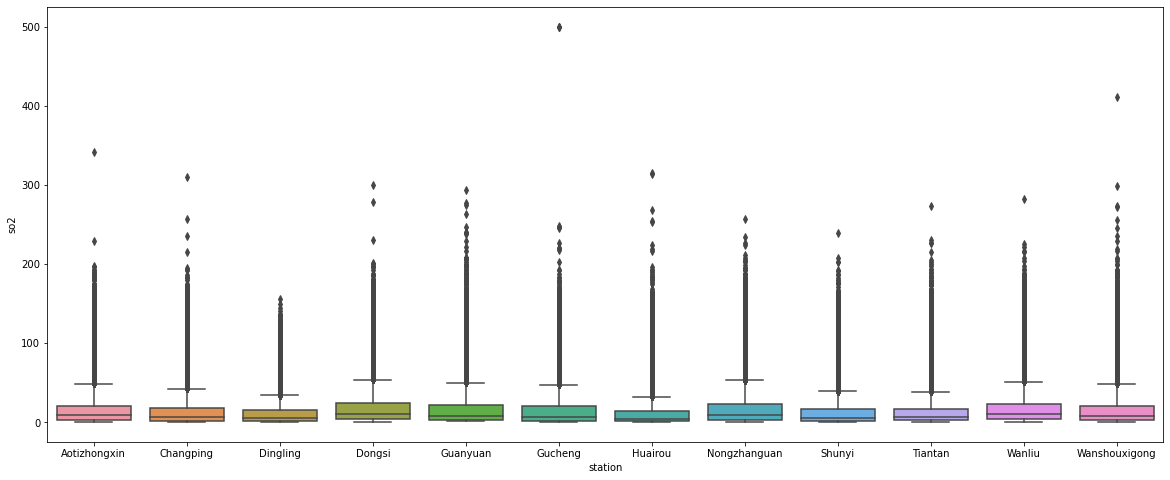

In [38]:
sns.boxplot(data=air_quality, x='station', y='so2')
plt.show()

- These look slightly more skewed. There are definite extreme outliers here, especially in the data for Gucheng. Even Changping, Dongsi, and Huairou have SO2 values that don't seem normal and are quite distant from the rest of the values.

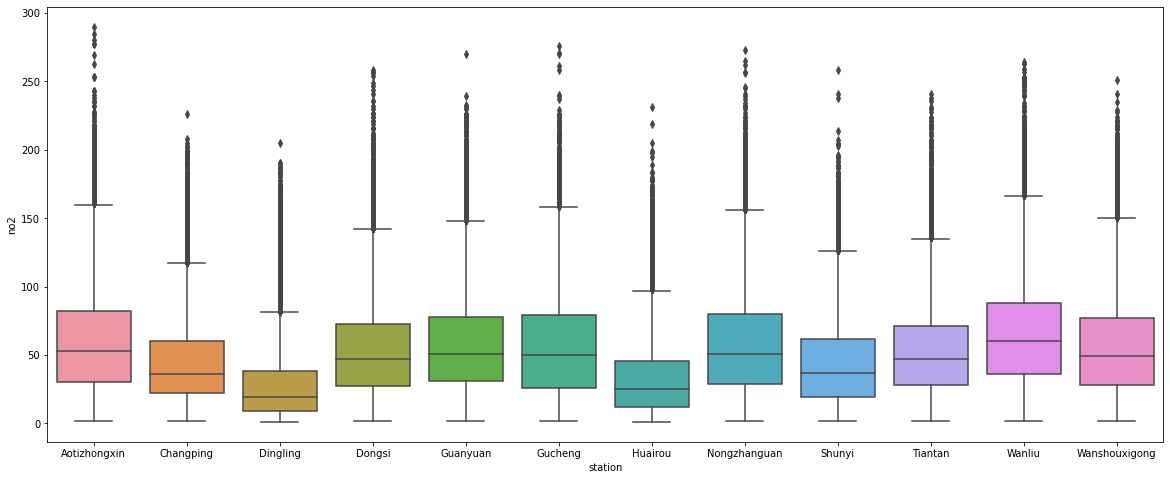

In [39]:
sns.boxplot(data=air_quality, x='station', y='no2')
plt.show()

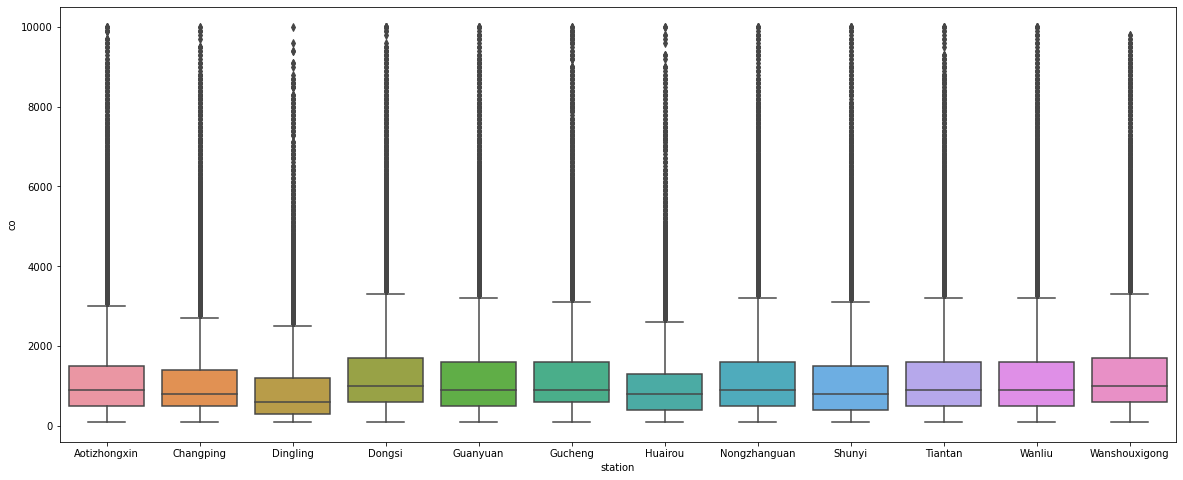

In [40]:
sns.boxplot(data=air_quality, x='station', y='co')
plt.show()

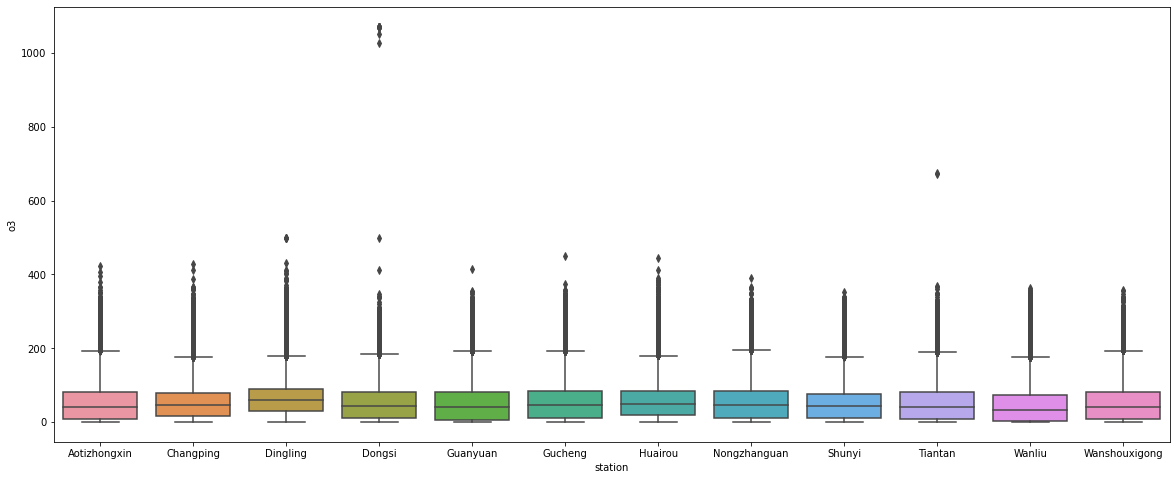

In [41]:
sns.boxplot(data=air_quality, x='station', y='o3')
plt.show()

- There are extreme outliers in the case of O3, and these outliers should be genuine outliers (mistakes in capturing data) because such high levels of ozone in the air are harmful.

## Missing Values

In [42]:
new_air = air_quality

In [43]:
new_air.isna().sum()

year           0
month          0
day            0
hour           0
pm25        8739
pm10        6449
so2         9021
no2        12116
co         20701
o3         13277
temp         398
pres         393
dewp         403
wd          1822
wspm         318
station        0
dtype: int64

In [44]:
new_air.pm25.median()

55.0

In [45]:
new_air['pm25'] = new_air.groupby('station')['pm25'].transform(lambda x: x.fillna(x.median()))
new_air['pm25'].isna().sum()

0

In [46]:
new_air['pm10'] = new_air.groupby('station')['pm10'].transform(lambda x: x.fillna(x.median()))
new_air['so2'] = new_air.groupby('station')['so2'].transform(lambda x: x.fillna(x.median()))
new_air['no2'] = new_air.groupby('station')['no2'].transform(lambda x: x.fillna(x.median()))
new_air['co'] = new_air.groupby('station')['co'].transform(lambda x: x.fillna(x.median()))
new_air['o3'] = new_air.groupby('station')['o3'].transform(lambda x: x.fillna(x.median()))
new_air['temp'] = new_air.groupby('station')['temp'].transform(lambda x: x.fillna(x.median()))
new_air['pres'] = new_air.groupby('station')['pres'].transform(lambda x: x.fillna(x.median()))
new_air['dewp'] = new_air.groupby('station')['dewp'].transform(lambda x: x.fillna(x.median()))
new_air['wspm'] = new_air.groupby('station')['wspm'].transform(lambda x: x.fillna(x.median()))

In [47]:
new_air.isna().sum()

year          0
month         0
day           0
hour          0
pm25          0
pm10          0
so2           0
no2           0
co            0
o3            0
temp          0
pres          0
dewp          0
wd         1822
wspm          0
station       0
dtype: int64

In [48]:
## Using mode to fill missing values in wd column
new_air['wd'] = new_air.groupby('station')['wd'].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [49]:
new_air.isna().sum()

year       0
month      0
day        0
hour       0
pm25       0
pm10       0
so2        0
no2        0
co         0
o3         0
temp       0
pres       0
dewp       0
wd         0
wspm       0
station    0
dtype: int64

## Analysis

### Observing the Concentration of PM25 and PM10 per Year

In [50]:
year_pm25 = new_air.groupby(['year'], as_index=False)['pm25'].median()
year_pm10 = new_air.groupby(['year'], as_index=False)['pm10'].median()

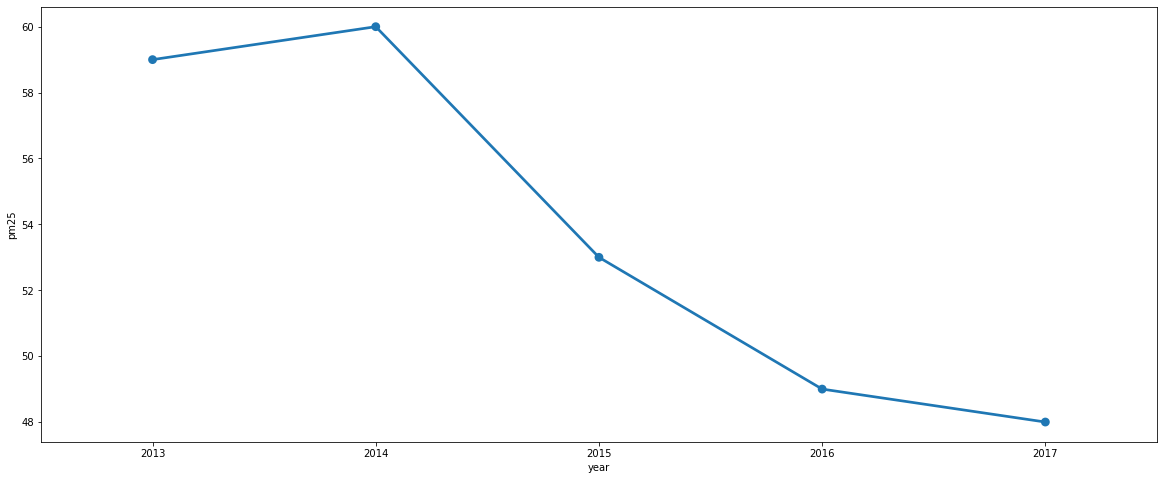

In [51]:
sns.pointplot(data=year_pm25, x='year', y='pm25')
plt.show()

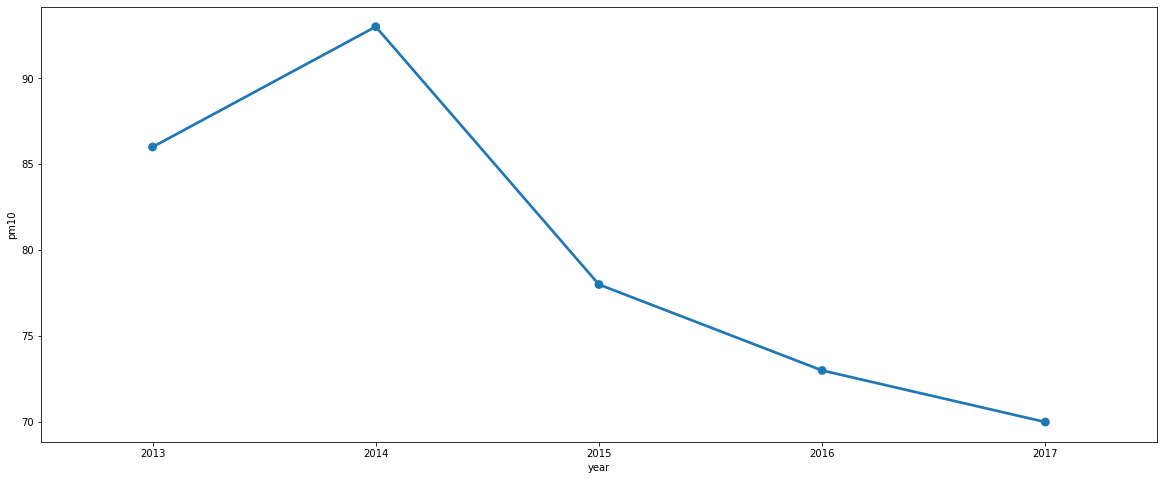

In [52]:
sns.pointplot(data=year_pm10, x='year', y='pm10')
plt.show()

### Observing the Pollutant Concentration per Year

In [53]:
year_so2 = new_air.groupby(['year'], as_index=False)['so2'].median()
year_no2 = new_air.groupby(['year'], as_index=False)['no2'].median()
year_co = new_air.groupby(['year'], as_index=False)['co'].median()
year_o3 = new_air.groupby(['year'], as_index=False)['o3'].median()

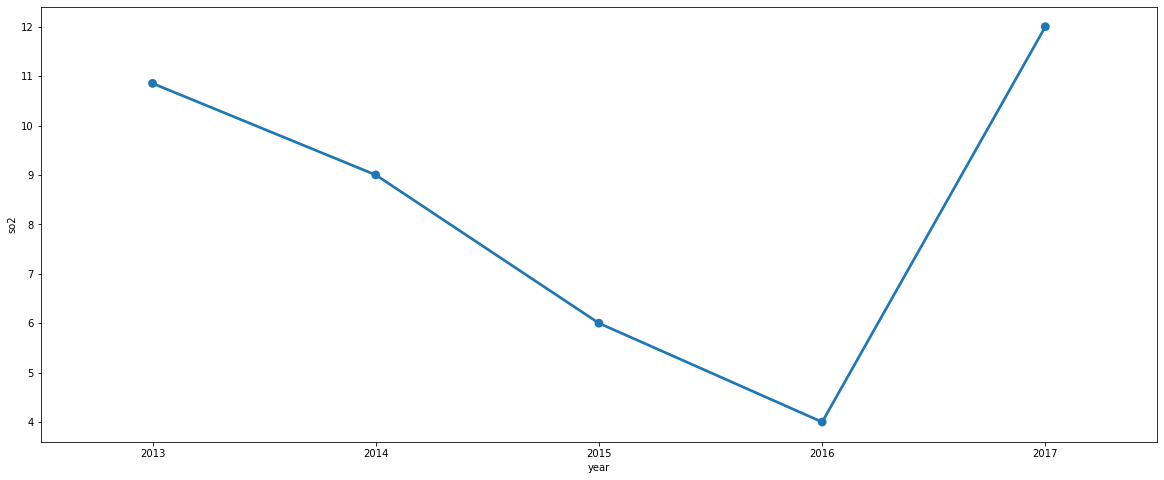

In [54]:
sns.pointplot(data=year_so2, x='year', y='so2')
plt.show()

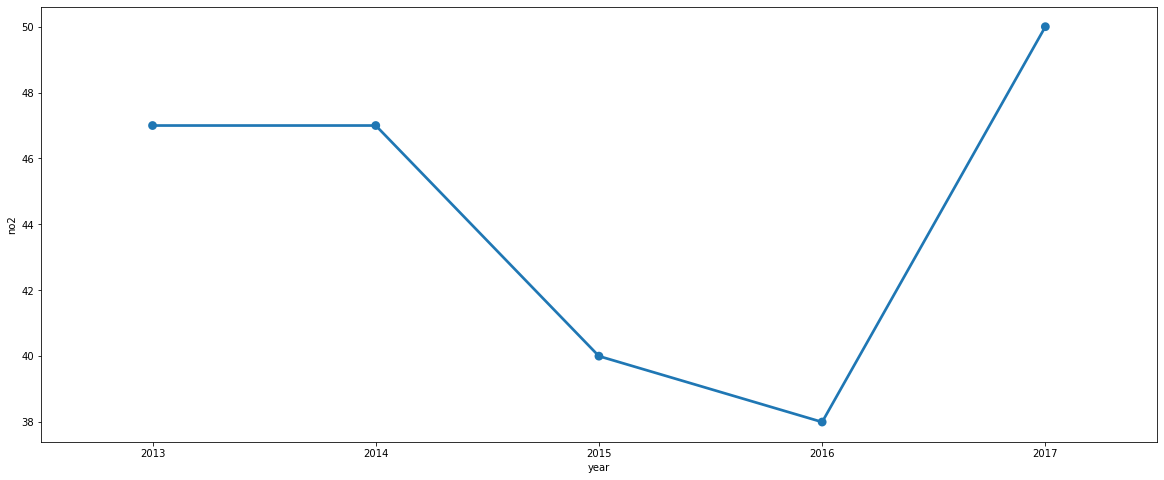

In [55]:
sns.pointplot(data=year_no2, x='year', y='no2')
plt.show()

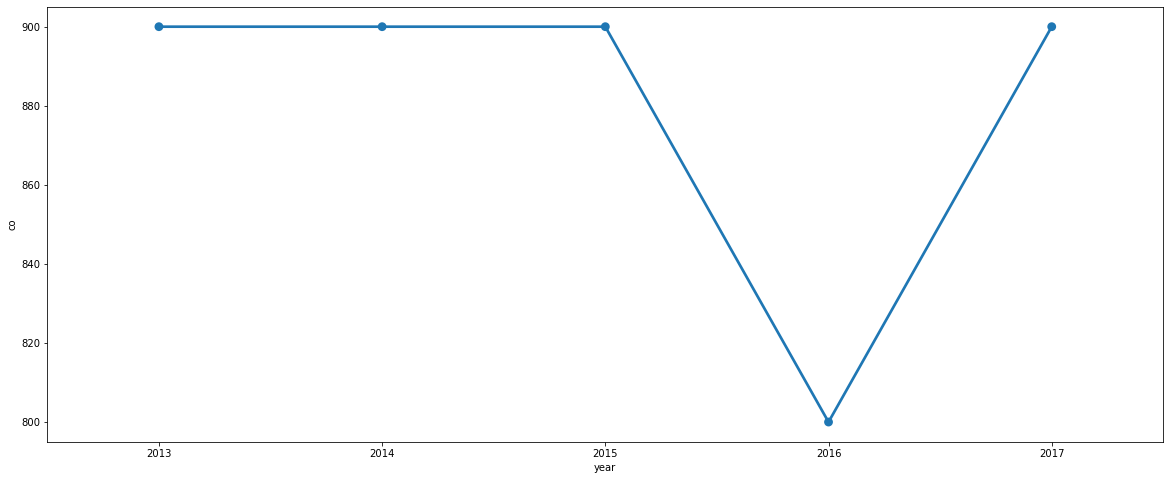

In [56]:
sns.pointplot(data=year_co, x='year', y='co')
plt.show()

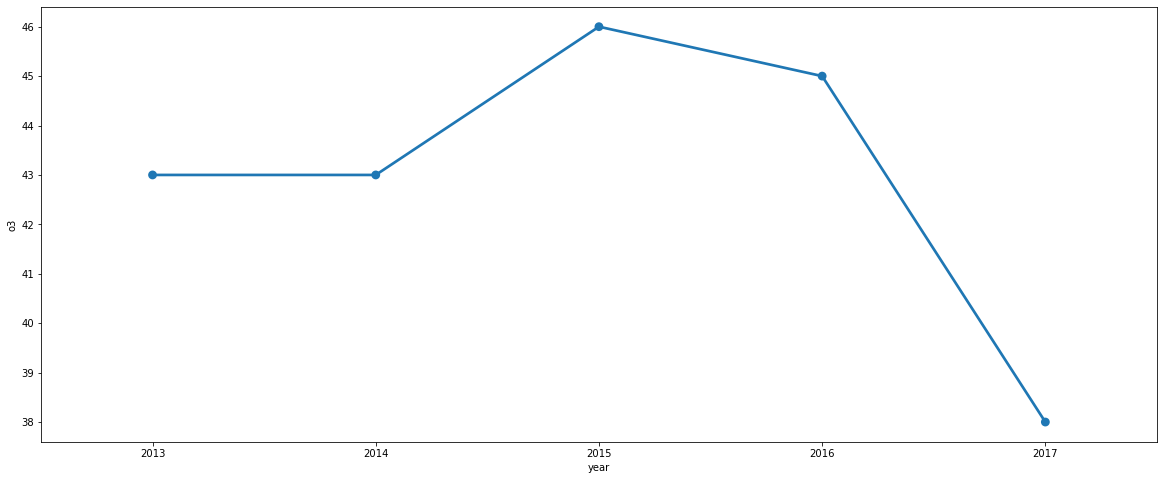

In [57]:
sns.pointplot(data=year_o3, x='year', y='o3')
plt.show()

### Observing Pollutant Concentration per Month

In [58]:
month_pm25 = new_air.groupby(['month'], as_index=False)['pm25'].median()
month_pm10 = new_air.groupby(['month'], as_index=False)['pm10'].median()
month_so2 = new_air.groupby(['month'], as_index=False)['so2'].median()
month_no2 = new_air.groupby(['month'], as_index=False)['no2'].median()
month_co = new_air.groupby(['month'], as_index=False)['co'].median()
month_o3 = new_air.groupby(['month'], as_index=False)['o3'].median()

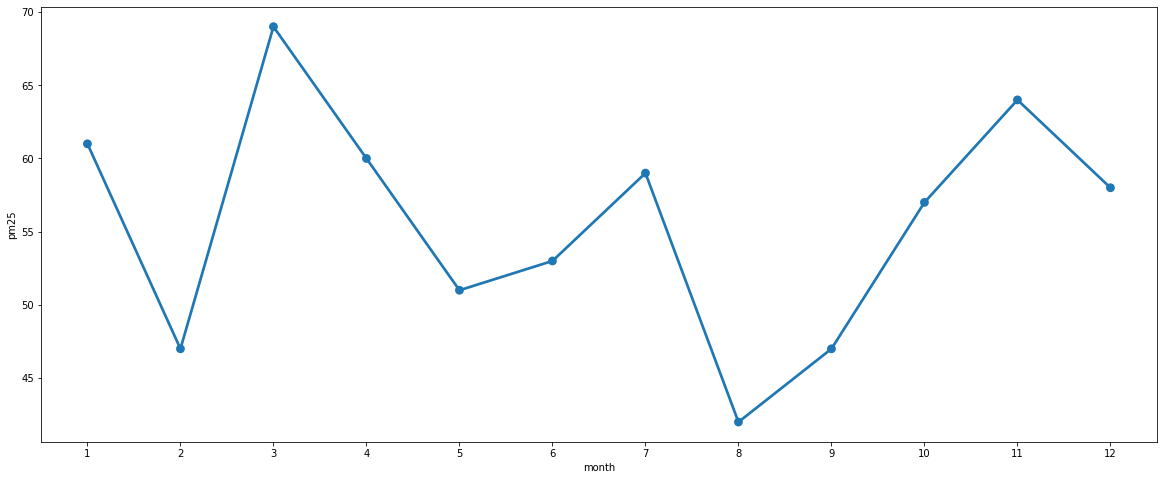

In [59]:
sns.pointplot(data=month_pm25, x='month', y='pm25')
plt.show()

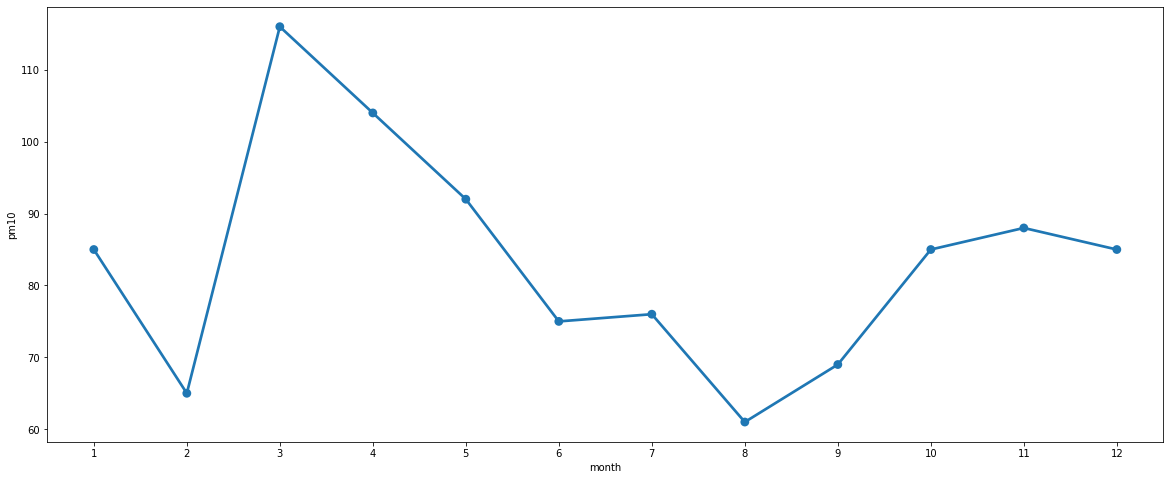

In [60]:
sns.pointplot(data=month_pm10, x='month', y='pm10')
plt.show()

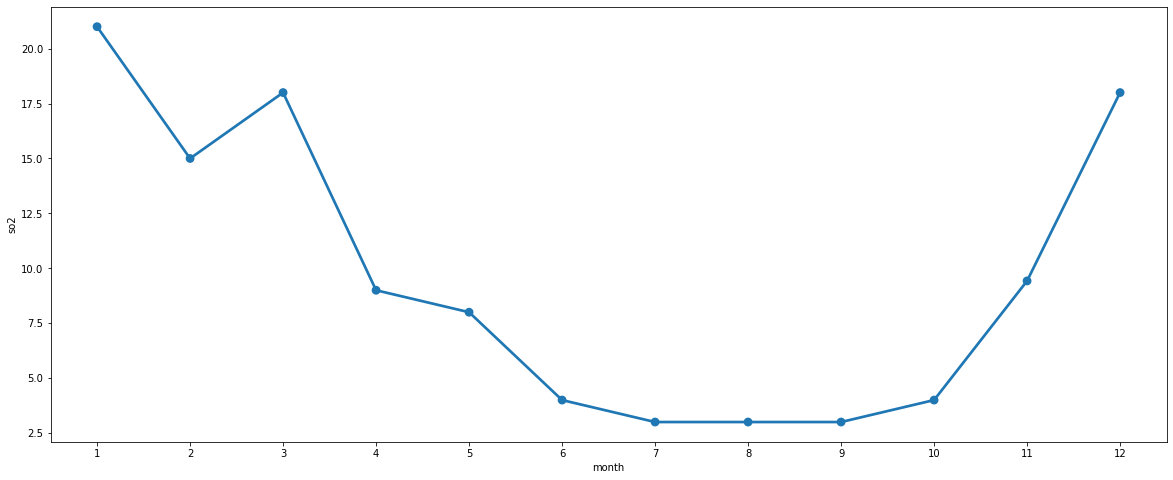

In [61]:
sns.pointplot(data=month_so2, x='month', y='so2')
plt.show()

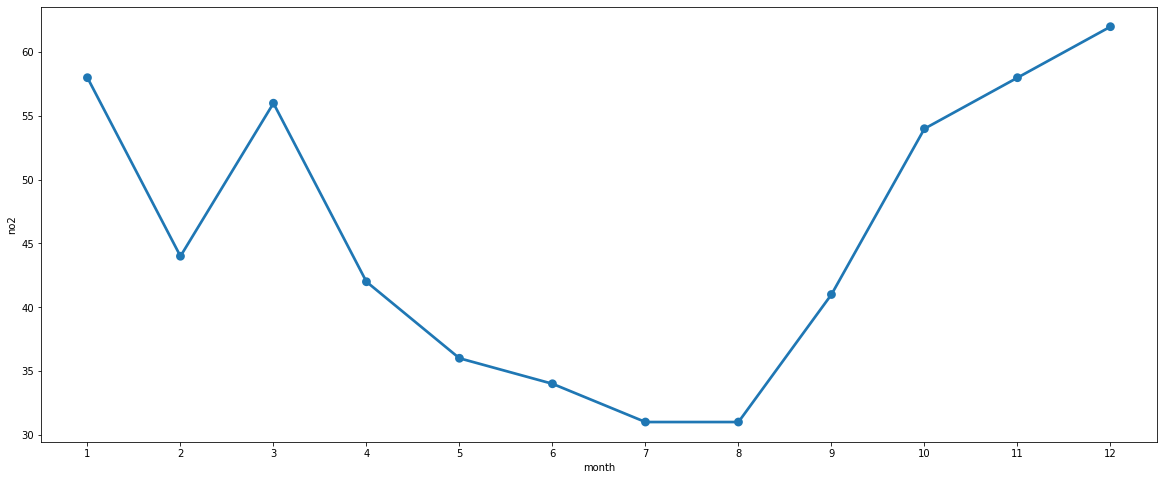

In [62]:
sns.pointplot(data=month_no2, x='month', y='no2')
plt.show()

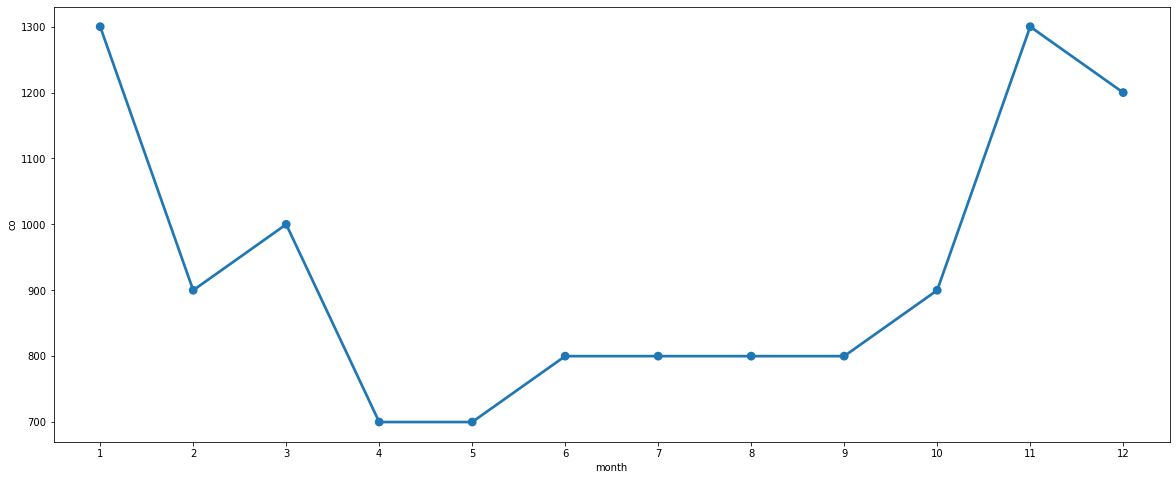

In [63]:
sns.pointplot(data=month_co, x='month', y='co')
plt.show()

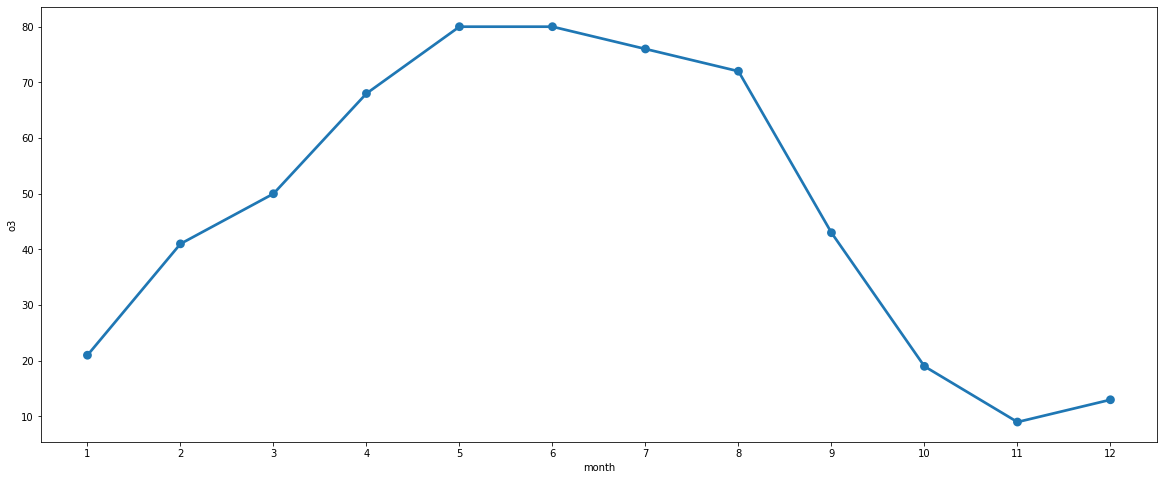

In [64]:
sns.pointplot(data=month_o3, x='month', y='o3')
plt.show()

### COrrelation

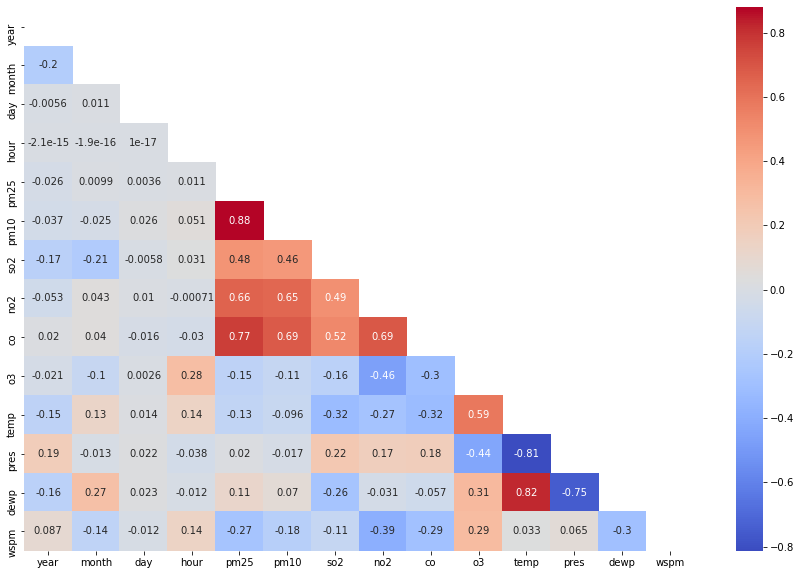

In [65]:
corr_matrix = new_air.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, annot=True, fmt='.2g', cmap='coolwarm', mask=np.triu(corr_matrix))
plt.show()